[link](https://yjucho1.github.io/time-series/dtw/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

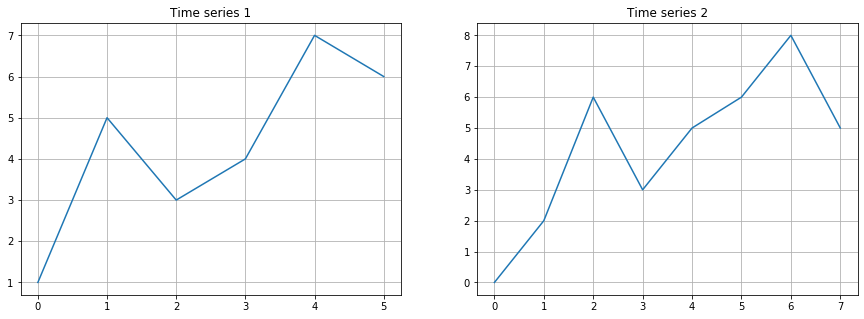

In [2]:
ts1 = [1, 5, 3, 4, 7, 6]
ts2 = [0, 2, 6, 3, 5, 6, 8, 5]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Time series 1')
plt.plot(ts1)
plt.grid(True)
plt.subplot(122)
plt.title('Time series 2')
plt.plot(ts2)
plt.grid(True)
plt.show()

```
np.corrcoef(ts1, ts2)
```
길이가 맞지 않아 오류 발생

유사도를 측정하기 위한 가장 간단한 방법은 상대적으로  
시계열의 길이가 짧은 시계열 1 데이터를 `interpolation` 하여 길이를 동일하게 맞춘 후,  
`np.corrcoef`를 사용하여 상관계수 계산

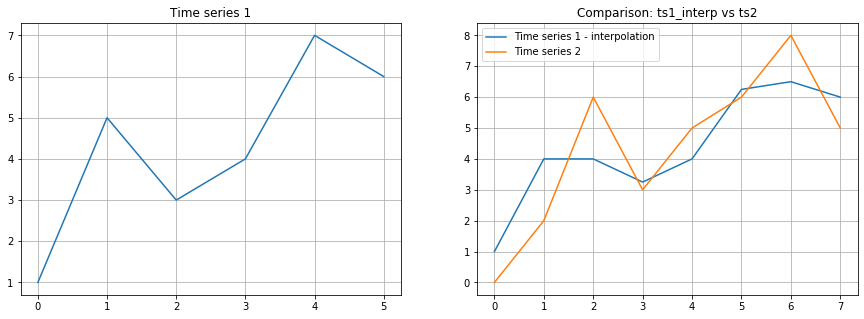

array([[1.        , 0.85206492],
       [0.85206492, 1.        ]])

In [3]:
len_ts1 = len(ts1)
len_ts2 = len(ts2)
interval = len_ts2 / float(len_ts1)
interp_ind = np.arange(0, len_ts2, interval)
ts1_interp = np.interp(np.arange(0, len_ts2, 1), interp_ind, ts1)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Time series 1')
plt.plot(ts1)
plt.grid(True)
plt.subplot(122)
plt.title('Comparison: ts1_interp vs ts2')
plt.plot(ts1_interp)
plt.plot(ts2)
plt.legend(['Time series 1 - interpolation', 'Time series 2'])
plt.grid(True)
plt.show()

np.corrcoef(ts1_interp, ts2)

단순히 `선형 보간(linear interpolation)` 방법은 기존의 시계열 데이터 1이  
가지고 있는 모습을 꽤 왜곡시키는 결과를 낳는다.  
이렇게 길이가 서로 다른 두 시계열의 유사도를 계산하는 방법으로  
`DTW (Dynamic Time Warping)`를 사용할 수 있다.  
DTW는 시퀀스의 길이를 고려하지 않기 때문에 서로 다른 길이의 시퀀스의 유사도를  
바로 계산할 수 있다.

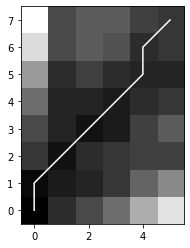

In [4]:
from dtw import dtw
x = np.array(ts1).reshape(-1, 1)
y = np.array(ts2).reshape(-1, 1)

euclidean_norm = lambda x, y: np.abs(x - y)

d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

Cost matrix와 최적 path는 위 이미지에 표시된 것과 같고,  
이를 다시 시계열 차트에서 비교하면 아래와 같다.  
dtw를 통해 warping된 시계열 데이터 1과 시계열 데이터 2의 상관계수를 구한 결과  
약 0.92로 단순 선형 보간에 의한 상관계수 0.85보다 더 높은 값이 계산되는 것을 볼 수 있다.

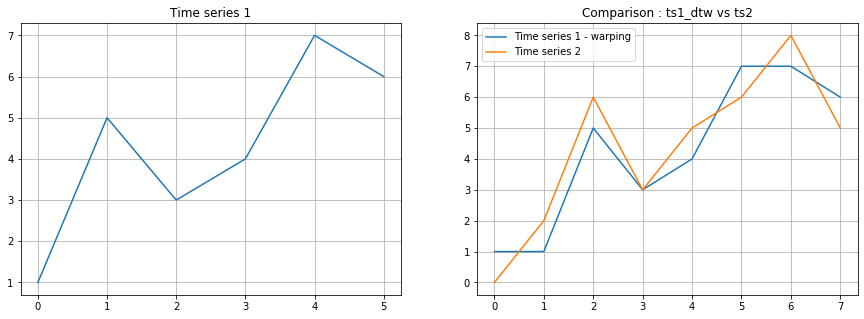

array([[1.        , 0.92247328],
       [0.92247328, 1.        ]])

In [5]:
ts1_dtw = [ts1[p] for p in path[0]]
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Time series 1')
plt.plot(ts1)
plt.grid(True)
plt.subplot(122)
plt.title('Comparison : ts1_dtw vs ts2')
plt.plot(ts1_dtw)
plt.plot(ts2)
plt.legend(['Time series 1 - warping', 'Time series 2'])
plt.grid(True)
plt.show()

np.corrcoef(ts1_dtw, ts2)